# 05. Mapping

In this section we will take the points retrived from the SpaCy processing of the text of the tweets, and map them on interactive map. In this process we used the a GeoPandas DataFrame to house our Shapely point coordinations and then used folium to map the locations found in the tweets. 

[Install and Import Packages](#Install-and-Import-Packages)  
[Randomly Generated Map](#Randomly-Generated-Map)  
[Plotting Tweets](#Plotting-Tweets)

### Install and Import Packages 

In [ ]:
# You'll need to install these packages if they aren't already installed. 
# !pip install folium
# !pip install geopandas
# !pip install shapely

In [29]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import uniform

## Mapping Libraries
from shapely.geometry import Point
import geopandas as gpd
from folium.plugins import MarkerCluster,FeatureGroupSubGroup,Fullscreen
from ipyleaflet import basemaps, basemap_to_tiles, Marker, Map, Popup
from folium.map import Layer,FeatureGroup
import folium


### Randomly Generated Map

In the process of the project we wanted to make sure we had a map working while we were still training the SpaCy model. Below is a map created with randomly generated points to simulate the map functionality. 

In [10]:
#this code came from the help of Grace and Dimitri and also: 
#https://gis.stackexchange.com/questions/59339/generate-random-world-point-geometries
def newpoint():
    return  uniform(30.156408, 30.322211), uniform(-85.604793 , -85.995599)   # lat/long  close to the FL panhandle
#specifies how many 'new points' we want, default is 10, we'll create 30 points 
points = (newpoint() for x in range(30))
#prints all the generated coordinates
for point in points:
    df = pd.DataFrame(list(points), columns = ['latitude', 'longitude']) 
    pointlist = df.values.tolist()
    len(pointlist)
    

In [11]:
#checking out the points 
pointlist[:5]

[[30.275536933075546, -85.86359948606226],
 [30.21857853841694, -85.63075193549783],
 [30.213342170736723, -85.7693942467926],
 [30.279900995795973, -85.6357714878092],
 [30.161489722102388, -85.82365047298886]]

From here we'll create the Geopandas DataFrame with coordinates from the map of Florida. 

In [12]:
#This code is adapted from Noah's local lecture on geopandas 
# Convert our dataframe into a GeoPandas dataframe by using longitude and latitude to create point geometries
# Create point geometries column
geom = [Point(xy) for xy in zip(df['latitude'], df['longitude'])]

# Set the coordinate reference system we'll be using. EPSG:3086 is the CRS for Florida 
crs = {'init':'epsg:3086'}
lat_long_gpd = gpd.GeoDataFrame(df, crs = crs, geometry = geom)

## Make sure our coordinated are in the correct coordinate reference system
lat_long_gpd = lat_long_gpd.to_crs({'init':'epsg:3086'})
lat_long_gpd.head()

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,latitude,longitude,geometry
0,30.275537,-85.863599,POINT (30.27554 -85.86360)
1,30.218579,-85.630752,POINT (30.21858 -85.63075)
2,30.213342,-85.769394,POINT (30.21334 -85.76939)
3,30.279901,-85.635771,POINT (30.27990 -85.63577)
4,30.161490,-85.823650,POINT (30.16149 -85.82365)


In [13]:
#Checking out the shape of the new DF to confirm proper rows 
lat_long_gpd.shape

(29, 3)

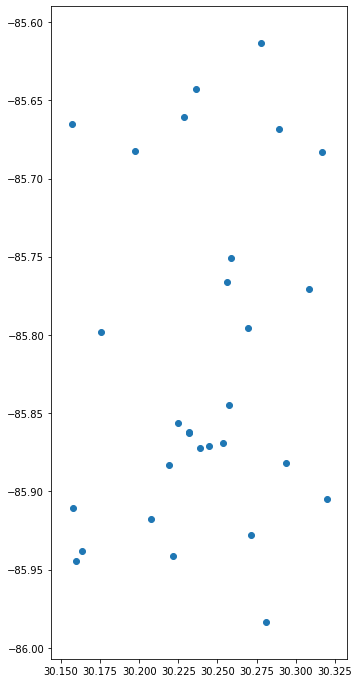

In [108]:
#Plotting that data 
lat_long_gpd.plot(figsize = (12,12))

Finally we'll create the map with Folium, adding points for each of our randomly genereated points. 

In [109]:
# Plotting that with folium
tweet_map = folium.Map(location = [30.1766, - 85.8055], ## initial map focus, on Panama City Florida
                          zoom_start = 7, ## zoom level
                          control_scale=True, 
                          prefer_canvas = True)

#For loop to add points to map
for point in range(0, len(pointlist)):  #for point in the list 
    folium.Marker(pointlist[point], popup= pointlist[point]).add_to(tweet_map)
    #create point, popup is the coordinates, adding to map 

tweet_map.save('../maps/rand_tweet_map.html') #saving the map 
#Thanks again to Noah for his folium lecture!  

### Plotting Tweets 

Once we were able to process the data through our  SpaCy classifer and then HERE geocoder API, we were able to extract locations from our historical tweets.  We'll read that data in and process it for mapping. 

In [20]:
#reading in the data 
live = pd.read_csv('../datasets/text_coor_date.csv')

In [21]:
#checking out the head 
live.head()

,text,address,latitude,longitude,date
0,Cleared: Traffic congestion in Bay on US-231 s...,US-231 south State Route 20 Bay FL,28.82179,-95.946362,2018-10-14 22:07:31+00:00
1,Cleared: Object on roadway in Okaloosa on I-10...,Interstate 10 west Mile Marker 51 Okaloosa FL,30.41195,-86.729630,2018-10-14 20:47:24+00:00
2,New: Object on roadway in Okaloosa on I-10 wes...,Interstate 10 west Mile Marker 51 Okaloosa FL,30.41195,-86.729630,2018-10-14 20:46:31+00:00
3,Updated: Traffic congestion in Bay on US-231 s...,US-231 south State Route 20 Bay FL,28.82179,-95.946362,2018-10-14 20:06:28+00:00
4,Updated: Traffic congestion in Bay on US-231 s...,US-231 south State Route 20 Bay FL,28.82179,-95.946362,2018-10-14 20:05:21+00:00


In [22]:
#confirming data types 
live.dtypes

text          object
address       object
latitude     float64
longitude    float64
date          object
dtype: object

In [23]:
#creating a column that has the text of tweet as well as the date it was posted, for the map popups
live['text_date'] = live['date'] + live['text']

In [24]:
#confirming changes 
live.head(2)

,text,address,latitude,longitude,date,text_date
0,Cleared: Traffic congestion in Bay on US-231 s...,US-231 south State Route 20 Bay FL,28.82179,-95.946362,2018-10-14 22:07:31+00:00,2018-10-14 22:07:31+00:00Cleared: Traffic cong...
1,Cleared: Object on roadway in Okaloosa on I-10...,Interstate 10 west Mile Marker 51 Okaloosa FL,30.41195,-86.729630,2018-10-14 20:47:24+00:00,2018-10-14 20:47:24+00:00Cleared: Object on ro...


In [25]:
#creating variable of the latitude and longitude 
locations = live[['latitude', 'longitude']]
#making the series into a list 
locationlist = locations.values.tolist()
#confirming length of list 
len(locationlist)

222

Creating the GeoPandas DataFrame with points generated from our historical twitter data. 

In [27]:
#This code is adapted from Noah's local lecture on geopandas 
# Convert our dataframe into a GeoPandas dataframe by using longitude and latitude to create point geometries
# Create point geometries column
geom = [Point(xy) for xy in zip(live['latitude'], live['longitude'])]

# Set the coordinate reference system we'll be using. EPSG:3086 is the CRS for Florida 
crs = {'init':'epsg:3086'}
tweets_gpd = gpd.GeoDataFrame(live, crs = crs, geometry = geom)

# Make sure our coordinated are in the correct coordinate reference system
tweets_gpd = tweets_gpd.to_crs({'init':'epsg:3086'})
tweets_gpd.head()

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,text,address,latitude,longitude,date,text_date,geometry
0,Cleared: Traffic congestion in Bay on US-231 s...,US-231 south State Route 20 Bay FL,28.82179,-95.946362,2018-10-14 22:07:31+00:00,2018-10-14 22:07:31+00:00Cleared: Traffic cong...,POINT (28.822 -95.946)
1,Cleared: Object on roadway in Okaloosa on I-10...,Interstate 10 west Mile Marker 51 Okaloosa FL,30.41195,-86.729630,2018-10-14 20:47:24+00:00,2018-10-14 20:47:24+00:00Cleared: Object on ro...,POINT (30.412 -86.730)
2,New: Object on roadway in Okaloosa on I-10 wes...,Interstate 10 west Mile Marker 51 Okaloosa FL,30.41195,-86.729630,2018-10-14 20:46:31+00:00,2018-10-14 20:46:31+00:00New: Object on roadwa...,POINT (30.412 -86.730)
3,Updated: Traffic congestion in Bay on US-231 s...,US-231 south State Route 20 Bay FL,28.82179,-95.946362,2018-10-14 20:06:28+00:00,2018-10-14 20:06:28+00:00Updated: Traffic cong...,POINT (28.822 -95.946)
4,Updated: Traffic congestion in Bay on US-231 s...,US-231 south State Route 20 Bay FL,28.82179,-95.946362,2018-10-14 20:05:21+00:00,2018-10-14 20:05:21+00:00Updated: Traffic cong...,POINT (28.822 -95.946)


Lastly, ploting those point on the map of Florida with a pop-up that contains the date and text of the tweets. 

In [28]:
# Creating map with folium 
r_tweet_map = folium.Map(location = [30.1766, - 85.8055], ## initial map focus
                          zoom_start = 9, ## zoom level
                          control_scale=True, 
                          prefer_canvas = True)

#For loop to add points to map
for point in range(0, len(locationlist)): #for point in list 
    folium.Marker(locationlist[point] , popup= tweets_gpd['text_date'][point]).add_to(r_tweet_map)
     #create point, popup is the date/text of tweets, and added to map 
#saving map 
r_tweet_map.save('../maps/historic_tweet_map.html')
#Thanks again to Noah for his folium lecture! 